In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
hyprcoloc_results = pd.read_csv("../code/hyprcoloc/Results/transcripts_10.ForGWASColoc/GWAS_GTEx_01/results.txt.gz", 
                                sep='\t')

annotation = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/annotated.snmf.merged_isoforms.tab.gz', sep='\t')
annotation['gene_id'] = annotation.transcript.apply(lambda x: x.split('.')[0])
second_annotation = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/second_annotation.snmf.merged_isoforms.tab.gz', sep='\t',
                               names = ['gene', 'transcript', 'chain', 'ref_transcript', 'intron_retention', 'utr'])


In [3]:
hyprcoloc_results['GWAS_trait'] = hyprcoloc_results.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.apply(lambda x: '_'.join(x.split('_')[2:]))

trait_coloc = []
for idx, row in hyprcoloc_results.iterrows():
    trait = row.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait
    try:
        trait_coloc.append(trait in row.ColocalizedTraits)
    except:
        trait_coloc.append(False)

hyprcoloc_results['coloc'] = trait_coloc

In [4]:
hyprcoloc_results.loc[hyprcoloc_results.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait == 'chr22_45887417_GCST004988']

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc
47524,chr22_45887417_GCST004988,1,"Brain_Cortex;ENSG00000075234.isoform_6, Heart_...",0.7608,1.0000,chr22_46287058_C_T_b38,0.0918,NaN,GCST004988,False
47525,chr22_45887417_GCST004988,2,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.3777,0.6743,chr22_46291323_G_A_b38,0.0574,NaN,GCST004988,False
47526,chr22_45887417_GCST004988,3,"Lung;ENSG00000077942.isoform_1, Skin_Not_Sun_E...",0.9774,0.9988,chr22_45558650_G_A_b38,0.4047,NaN,GCST004988,False
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False
47531,chr22_45887417_GCST004988,8,NaN,NaN,0.0067,NaN,NaN,Muscle_Skeletal;ENSG00000075234.isoform_7,GCST004988,False


In [5]:
dropped_trait = []
for idx, row in hyprcoloc_results.iterrows():
    if str(row.DroppedTrait) == 'nan':
        dropped_trait.append(False)
    else:
        dropped_trait.append(row.GWAS_trait in row.DroppedTrait)

hyprcoloc_results['Dropped_GWAS_trait'] = dropped_trait

In [6]:
(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait').coloc.sum() > 0).mean()

0.11955405603637964

In [7]:
hyprcoloc_results

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
0,chr1_116537544_multiple_sclerosis,1,NaN,NaN,0.0154,NaN,NaN,chr1_116537544_multiple_sclerosis,multiple_sclerosis,False,True
1,chr1_192572342_multiple_sclerosis,1,NaN,NaN,0.0138,NaN,NaN,chr1_192572342_multiple_sclerosis,multiple_sclerosis,False,True
2,chr1_2594226_multiple_sclerosis,1,"Brain_Cortex;ENSG00000157881.isoform_3, Lung;E...",0.9485,0.9990,chr1_2514891_A_G_b38,0.3951,NaN,multiple_sclerosis,False,False
3,chr1_2594226_multiple_sclerosis,2,NaN,NaN,0.0162,NaN,NaN,chr1_2594226_multiple_sclerosis,multiple_sclerosis,False,True
4,chr1_2594226_multiple_sclerosis,3,NaN,NaN,0.0024,NaN,NaN,Skin_Not_Sun_Exposed_Suprapubic;ENSG0000011615...,multiple_sclerosis,False,False
...,...,...,...,...,...,...,...,...,...,...,...
47527,chr22_45887417_GCST004988,4,NaN,NaN,0.0183,NaN,NaN,chr22_45887417_GCST004988,GCST004988,False,True
47528,chr22_45887417_GCST004988,5,NaN,NaN,0.0168,NaN,NaN,Liver;ENSG00000130638.isoform_4,GCST004988,False,False
47529,chr22_45887417_GCST004988,6,NaN,NaN,0.0180,NaN,NaN,Liver;ENSG00000075234.isoform_1,GCST004988,False,False
47530,chr22_45887417_GCST004988,7,NaN,NaN,0.0101,NaN,NaN,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,GCST004988,False,False


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82],
 [Text(0, 0, 'total_cerebral_volume'),
  Text(1, 0, 'amyotrophic_lateral_sclerosis'),
  Text(2, 0, 'autism_spectrum_disorder'),
  Text(3, 0, 'cardioembolic_stroke'),
  Text(4, 0, 'cerebral_aneurysm'),
  Text(5, 0, 'cerebrospinal_fluid_p-tau_levels'),
  Text(6, 0, 'cerebrospinal_fluid_p-tau_levels_in_APOE_e4_carriers'),
  Text(7, 0, 'cerebrospinal_fluid_p-tau_levels_in_APOE_e4_non-carriers'),
  Text(8, 0, 'cerebrospinal_fluid_p-tau_levels_in_abnormal_amyloid_levels'),
  Text(9, 0, 'cerebrospinal_fluid_p-tau

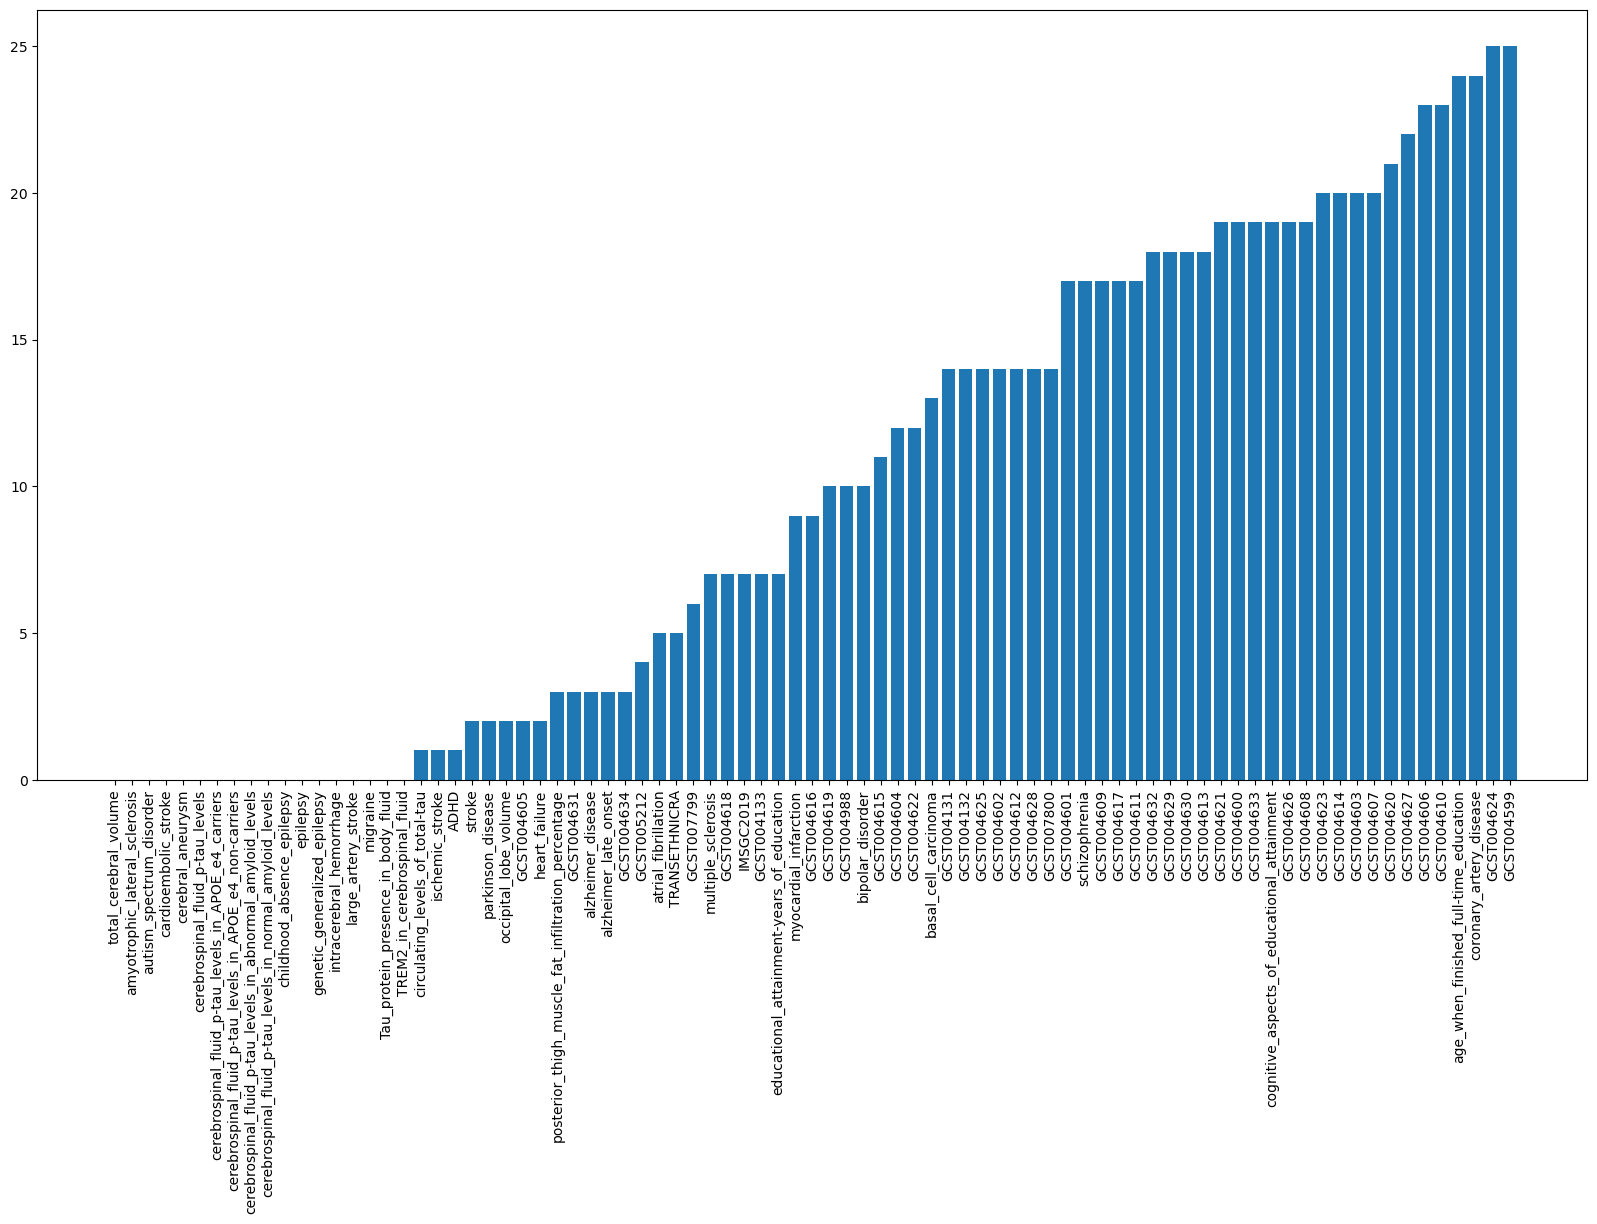

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values().index, hyprcoloc_results.loc[~hyprcoloc_results.Dropped_GWAS_trait].groupby('GWAS_trait').coloc.sum().sort_values())
plt.xticks(rotation=90)

In [9]:
cassette_exons = pd.read_csv('../code/ebpmf_models/filtered/snmf_10/tables/cassette_exons.bed.gz', sep='\t')

ce_transcripts = []
for tr in list(cassette_exons.transcripts):
    ce_transcripts.extend(tr.split('|'))

In [10]:
trait_annotations = {}
for trait, df in hyprcoloc_results.groupby('GWAS_trait'):
    trait_dir = {'ir':0, 
                 'utr':0,
                 'other':0,
                 'cassette':0,
                 'multiple':0,
                 'ir_utr':0,
                 'ir_cassette':0,
                 'cassette_utr':0,
                 'coloc_counter':0,
                 'percentage_coloc':0,
                 'counter':0}

    trait_dir['counter'] = len(hyprcoloc_results.loc[(hyprcoloc_results.GWAS_trait == trait) & (~hyprcoloc_results.Dropped_GWAS_trait)].GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.unique())
    
    for x in list(df.loc[df.coloc == True].ColocalizedTraits):
        add_ir = False
        add_cassette = False
        add_utr = False
        
        
        traits = x.split(', ')
        isoforms = sorted(set([y.split(';')[1] for y in traits if 'ENS' in y]))
        if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].intron_retention != 'no_intron_retention') > 0:
            add_ir = True
        if np.sum(second_annotation.loc[second_annotation.transcript.isin(isoforms)].utr != 'no_utr') > 0:
            add_utr = True
        for iso in isoforms:
            if iso in ce_transcripts:
                add_cassette = True
        if (add_cassette) and (not add_utr) and (not add_ir):
            trait_dir['cassette'] += 1
        elif (add_cassette) and (add_utr) and (not add_ir):
            trait_dir['cassette_utr'] += 1
        elif (add_cassette) and (not add_utr) and (add_ir):
            trait_dir['ir_cassette'] += 1
        elif (add_cassette) and (add_utr) and (add_ir):
            trait_dir['multiple'] += 1
        elif (not add_cassette) and (add_utr) and (not add_ir):
            trait_dir['utr'] += 1
        elif (not add_cassette) and (add_utr) and (add_ir):
            trait_dir['ir_utr'] += 1
        elif (not add_cassette) and (not add_utr) and (add_ir):
            trait_dir['ir'] += 1
        else:
            trait_dir['other'] += 1

        trait_dir['coloc_counter'] += 1

    if trait_dir['counter'] > 0:

        trait_dir['percentage_coloc'] = trait_dir['coloc_counter']/trait_dir['counter']
    
    trait_annotations.update({trait:trait_dir})

In [11]:
trait_df = pd.DataFrame(trait_annotations).T
trait_df = trait_df.loc[trait_df.counter > 0].sort_values('percentage_coloc')

In [12]:
trait_df.sort_values('percentage_coloc')

,ir,utr,other,cassette,multiple,ir_utr,ir_cassette,cassette_utr,coloc_counter,percentage_coloc,counter
total_cerebral_volume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,7.0
large_artery_stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
migraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.0
cardioembolic_stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5.0
intracerebral_hemorrhage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
basal_cell_carcinoma,2.0,2.0,1.0,3.0,1.0,0.0,4.0,0.0,13.0,0.209677,62.0
bipolar_disorder,1.0,0.0,1.0,2.0,1.0,1.0,3.0,1.0,10.0,0.217391,46.0
multiple_sclerosis,3.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,7.0,0.250000,28.0
GCST005212,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0.307692,13.0


(0.0, 0.35)

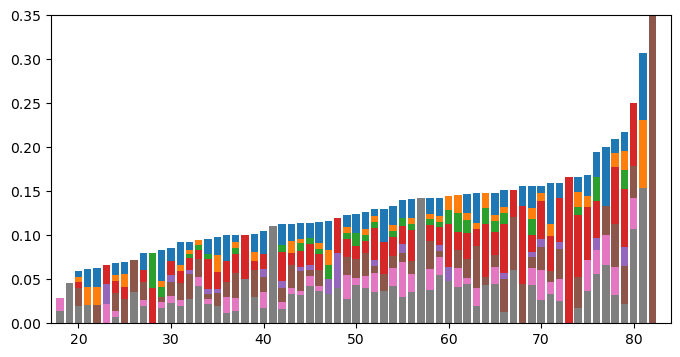

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter)+ (trait_df.multiple/trait_df.counter)+ (trait_df.other/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter)+ (trait_df.multiple/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) + (trait_df.cassette_utr/trait_df.counter))
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) + (trait_df.ir_cassette/trait_df.counter) )
ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter) + (trait_df.ir_utr/trait_df.counter) )

ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter)  + (trait_df.cassette/trait_df.counter))

ax.bar(range(83),(trait_df.ir/trait_df.counter) + (trait_df.utr/trait_df.counter))
ax.bar(range(83),trait_df.ir/trait_df.counter)

ax.set_xlim((17, 84))
ax.set_ylim((0, 0.35))

[]

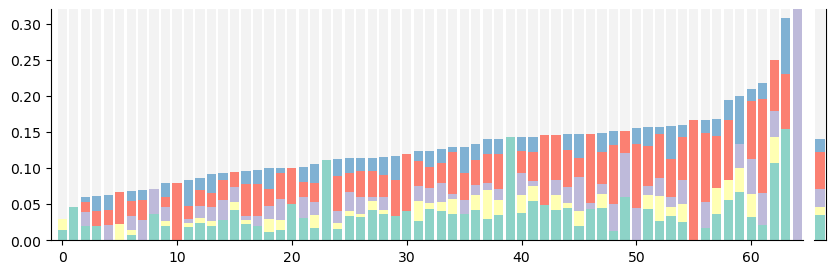

In [14]:
trait_selected_df = trait_df.loc[(trait_df.percentage_coloc > 0)]
colores = sns.color_palette('Set3')
r = trait_selected_df.shape[0]
fig, axes = plt.subplots(ncols = 2, figsize=(10, 3), gridspec_kw={'width_ratios': [10,0.15], 'wspace': 0.03})
# ax.bar(range(69), [1]*69, color='tab:gray', alpha=0.3)

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),trait_selected_df.percentage_coloc, color=colores[4])
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter, color=colores[2])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter, color=colores[1])
axes[0].bar(range(r),trait_selected_df.ir/trait_selected_df.counter, color=colores[0])

axes[0].set_xlim((-1, r-0.5))
axes[0].set_ylim((0, 0.32))

mean_all = trait_selected_df.percentage_coloc.mean()
mean_multiple = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter).mean()
mean_cassette = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter).mean()
mean_utr = ((trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter).mean()
mean_ir = ((trait_selected_df.ir)/trait_selected_df.counter).mean()

axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[1].bar([0], [mean_all], color=colores[4])
axes[1].bar([0], [mean_multiple], color=colores[3])
axes[1].bar([0], [mean_cassette], color=colores[2])
axes[1].bar([0], [mean_utr], color=colores[1])
axes[1].bar([0], [mean_ir], color=colores[0])

axes[1].set_ylim((0, 0.32))

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['left', 'top']].set_visible(False)

axes[1].set_yticks([])
axes[1].set_xticks([])


In [18]:
trait_selected_df.coloc_counter.sum()

815.0

In [21]:
trait_selected_df.counter.sum()

6746.0

In [22]:
815/6746

0.12081233323450934

In [14]:
gwas_names = pd.read_csv('/project2/yangili1/bjf79/ChromatinSplicingQTLs/code/config/gwas_table2.tsv', sep='\t')

In [15]:
gwas_names

,gwas,trait,FTPPath,SummaryStatsLocalFilepath,ProcessingMethod,Continuous,csv,First Author,PubMed ID,Publication date,Journal,Title,Trait(s),Data access
0,GCST004131,Inflammatory bowel disease,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,inflammatory bowel disease,FTP Download or API access
1,GCST004132,Crohn's disease,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022-2,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,crohn's disease,FTP Download or API access
2,GCST004133,Ulcerative colitis,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_6_Apr_2022-3,de Lange KM,28067908.0,2017-01-09,Nat Genet,Genome-wide association study implicates immun...,ulcerative colitis,FTP Download or API access
3,GCST004599,Mean platelet volume,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean platelet volume,NaN
4,GCST004600,Eosinophil percentage of white cells,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,eosinophil percentage of leukocytes,NaN
5,GCST004601,Red blood cell count,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,erythrocyte count,NaN
6,GCST004602,Mean corpuscular volume,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean corpuscular volume,NaN
7,GCST004603,Platelet count,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,platelet count,NaN
8,GCST004604,Hematocrit,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,hematocrit,NaN
9,GCST004605,Mean corpuscular hemoglobin concentration,http://ftp.ebi.ac.uk/pub/databases/gwas/summar...,NaN,GWAS_catalog_harmonised_from_beta_se,True,list_gwas_summary_statistics_PMID27863252,Astle WJ,27863252.0,2016-11-17,Cell,The Allelic Landscape of Human Blood Cell Trai...,mean corpuscular hemoglobin concentration,NaN


In [16]:
name_list = []
for idx in trait_selected_df.index:
    if idx.startswith('GCS'):
        new_name = gwas_names.loc[gwas_names.gwas == idx].trait.iloc[0]
    elif idx == 'IMSGC2019':
        new_name = 'Multiple sclerosis 2019'
    elif idx == 'TRANSETHNICRA':
        new_name == 'Rheumatoid arthritis'
    elif idx == 'ADHD':
        new_name == 'Attention-deficit/hyperactivity disorder'
    else:
        new_name = ' '.join(idx.capitalize().split('_'))
    name_list.append(new_name)

/tmp/jobs/41618611/ipykernel_28988/3613258.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(['95', '100'])
/tmp/jobs/41618611/ipykernel_28988/3613258.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(['95', '100'])
/tmp/jobs/41618611/ipykernel_28988/3613258.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels([str(int(x)) for x in np.linspace(0, 30, 7)])
/tmp/jobs/41618611/ipykernel_28988/3613258.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels([str(int(x)) for x in np.linspace(0, 30, 7)])


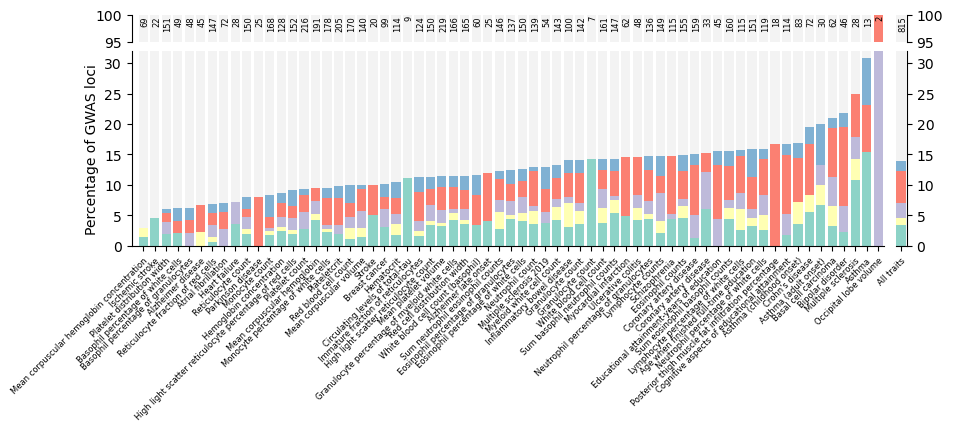

In [160]:
trait_selected_df = trait_df.loc[(trait_df.percentage_coloc > 0)]
colores = sns.color_palette('Set3')
r = trait_selected_df.shape[0]
fig, axes_ = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 3), gridspec_kw={'height_ratios': [1.4,10], 'hspace': 0.08, 'width_ratios': [10,0.15], 'wspace': 0.03})
# ax.bar(range(69), [1]*69, color='tab:gray', alpha=0.3)

axes = [axes_[0, 0], axes_[0, 1]]
axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])
axes[0].set_ylim([0.95, 1])
axes[1].set_ylim([0.95, 1])
axes[0].set_xlim((-1, r-0.5))
axes[0].spines[['right', 'top', 'bottom']].set_visible(False)
axes[1].spines[['left', 'top', 'bottom']].set_visible(False)
axes[1].yaxis.tick_right()
axes[0].set_xticks([])

axes[0].set_yticklabels(['95', '100'])
axes[1].set_yticklabels(['95', '100'])

axes[1].set_xticks([])

for i, n in enumerate(list(trait_selected_df.counter)):
    axes[0].text(i-0.25, 0.999, str(int(n)), rotation = 90, size=6,horizontalalignment='left',
        verticalalignment='top',)

axes[1].text(-0.25, 0.999, str(815), rotation = 90, size=6,horizontalalignment='left',
        verticalalignment='top',)


axes = [axes_[1, 0], axes_[1, 1]]

axes[0].bar(range(r), [1]*r, color = colores[8], alpha=0.3)
axes[0].bar(range(r),trait_selected_df.percentage_coloc, color=colores[4])
axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter,color=colores[3])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter, color=colores[2])

axes[0].bar(range(r),(trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter, color=colores[1])
axes[0].bar(range(r),trait_selected_df.ir/trait_selected_df.counter, color=colores[0])

axes[0].set_xlim((-1, r-0.5))
axes[0].set_ylim((0, 0.32))
axes[0].set_xticks([])



mean_all = trait_selected_df.percentage_coloc.mean()
mean_multiple = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette + trait_selected_df.ir_utr + trait_selected_df.ir_cassette + trait_selected_df.cassette_utr + trait_selected_df.multiple)/trait_selected_df.counter).mean()
mean_cassette = ((trait_selected_df.ir + trait_selected_df.utr + trait_selected_df.cassette)/trait_selected_df.counter).mean()
mean_utr = ((trait_selected_df.ir + trait_selected_df.utr)/trait_selected_df.counter).mean()
mean_ir = ((trait_selected_df.ir)/trait_selected_df.counter).mean()

axes[1].bar([0], [1], color = colores[8], alpha=0.3)

axes[1].bar([0], [mean_all], color=colores[4])
axes[1].bar([0], [mean_multiple], color=colores[3])
axes[1].bar([0], [mean_cassette], color=colores[2])
axes[1].bar([0], [mean_utr], color=colores[1])
axes[1].bar([0], [mean_ir], color=colores[0])

axes[1].set_ylim((0, 0.32))

axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['left', 'top']].set_visible(False)

axes[0].set_yticklabels([str(int(x)) for x in np.linspace(0, 30, 7)])
axes[1].set_yticklabels([str(int(x)) for x in np.linspace(0, 30, 7)])



# axes[1].set_yticks([])
axes[1].set_xticks([])

axes[1].yaxis.tick_right()

axes[0].set_ylabel('Percentage of GWAS loci')

axes[0].set_xticks(range(r), name_list, rotation=45, ha='right', rotation_mode='anchor', size=6)
axes[1].set_xticks([0], ['All traits'], rotation=45, ha='right', rotation_mode='anchor', size=6)

# axes[0].plot([0, 64], [0.14, 0.14], 'r--')



plt.savefig('../code/scratch_figures/figure4/coloc_barplot.pdf', bbox_inches='tight')
plt.savefig('../code/scratch_figures/figure4/coloc_barplot.png', bbox_inches='tight', dpi=500)

In [19]:
(trait_selected_df.ir.sum()) + (trait_selected_df.ir_cassette.sum()) + (trait_selected_df.ir_utr.sum()) + (trait_selected_df.multiple.sum())

440.0

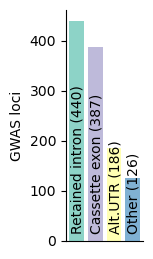

In [162]:
fig, ax = plt.subplots(figsize=(1, 3))
ax.bar([0, 1, 2, 3], [440, 387, 186, 126], color = [colores[0], colores[2], colores[1], colores[4]])
ax.set_ylabel('GWAS loci')
ax.text(-0.35, 20, 'Retained intron (440)', rotation=90)
ax.text(1-0.3, 20, 'Cassette exon (387)', rotation=90)
ax.text(2-0.3, 20, 'Alt.UTR (186)', rotation=90)
ax.text(3-0.3, 20, 'Other (126)', rotation=90)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([])
plt.savefig('../code/scratch_figures/figure4/coloc_barplot_summary.pdf', bbox_inches='tight')
plt.savefig('../code/scratch_figures/figure4/coloc_barplot_summary.png', bbox_inches='tight', dpi=500)

In [21]:
len(hyprcoloc_results.loc[(hyprcoloc_results.GWAS_trait == 'alzheimer_late_onset')].GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.unique())

27

In [22]:
hyprcoloc_results.loc[hyprcoloc_results.coloc & (hyprcoloc_results.GWAS_trait == 'parkinson_disease')]

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
4481,chr17_16107606_parkinson_disease,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.7766,0.9999,chr17_15976596_C_T_b38,1.0000,NaN,parkinson_disease,True,False
4572,chr17_46723974_parkinson_disease,6,"Brain_Cortex;ENSG00000176681.isoform_3, Brain_...",0.8822,1.0000,chr17_46723974_C_T_b38,0.1837,NaN,parkinson_disease,True,False


In [23]:
hyprcoloc_results.loc[hyprcoloc_results.coloc & (hyprcoloc_results.GWAS_trait == 'alzheimer_disease')]#.ColocalizedTraits.iloc[1]

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
24596,chr10_80494228_alzheimer_disease,4,"Whole_Blood;ENSG00000108219.isoform_5, chr10_8...",0.9447,0.9996,chr10_80509855_A_G_b38,0.1201,NaN,alzheimer_disease,True,False
24640,chr15_58764824_alzheimer_disease,1,"Brain_Cortex;ENSG00000137845.isoform_6, chr15_...",0.9832,1.0000,chr15_58753575_A_G_b38,0.5142,NaN,alzheimer_disease,True,False
24738,chr17_46720553_alzheimer_disease,2,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.4145,0.8136,chr17_46274212_T_C_b38,0.1787,NaN,alzheimer_disease,True,False


In [120]:
hyprcoloc_results.loc[hyprcoloc_results.coloc & (hyprcoloc_results.GWAS_trait == 'multiple_sclerosis')]#.ColocalizedTraits.iloc[1]

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
38,chr3_121824730_multiple_sclerosis,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.6121,0.6274,chr3_121824730_A_C_b38,0.9703,NaN,multiple_sclerosis,True,False
59,chr5_177361569_multiple_sclerosis,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.5935,0.5971,chr5_177357511_G_A_b38,0.9995,NaN,multiple_sclerosis,True,False
130,chr11_71457027_multiple_sclerosis,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.4825,0.6478,chr11_71439739_A_C_b38,1.0000,NaN,multiple_sclerosis,True,False
135,chr12_57788279_multiple_sclerosis,3,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.6692,0.9594,chr12_57774005_A_G_b38,0.3331,NaN,multiple_sclerosis,True,False
142,chr12_6330843_multiple_sclerosis,2,"Lung;ENSG00000067182.isoform_1, Whole_Blood;EN...",0.9999,0.9999,chr12_6337611_G_A_b38,1.0000,NaN,multiple_sclerosis,True,False
186,chr12_9753094_multiple_sclerosis,2,Heart_Atrial_Appendage;ENSG00000069493.isoform...,0.8422,0.9951,chr12_9715680_G_A_b38,0.7187,NaN,multiple_sclerosis,True,False
201,chr16_30119172_multiple_sclerosis,2,"Brain_Cortex;ENSG00000198064.isoform_4, Brain_...",0.8945,0.9589,chr16_30158072_C_G_b38,0.5261,NaN,multiple_sclerosis,True,False


In [123]:
hyprcoloc_results.loc[hyprcoloc_results.coloc & (hyprcoloc_results.GWAS_trait == 'multiple_sclerosis')].iloc[-1]

GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait                    chr16_30119172_multiple_sclerosis
HyprcolocIteration                                                                                     2
ColocalizedTraits                                      Brain_Cortex;ENSG00000198064.isoform_4, Brain_...
PosteriorColocalizationPr                                                                         0.8945
RegionalAssociationPr                                                                             0.9589
TopCandidateSNP                                                                   chr16_30158072_C_G_b38
ProportionPosteriorPrExplainedByTopSNP                                                            0.5261
DroppedTrait                                                                                         NaN
GWAS_trait                                                                            multiple_sclerosis
coloc                                                  

In [122]:
annotation.loc[annotation.transcript == 'ENSG00000198064.isoform_4']

,transcript,appris_transcript,appris_transcript_length,query_transcript_len,appris_ref,gencode_ref,gene_id
30984,ENSG00000198064.isoform_4,ENST00000697092,8,6,alt.5exon/alt.3exon/retained.intron/alt.ss.1,.,ENSG00000198064


In [97]:
second_annotation.loc[second_annotation.transcript == 'ENSG00000135407.isoform_4']

,gene,transcript,chain,ref_transcript,intron_retention,utr
19938,ENSG00000135407,ENSG00000135407.isoform_4,unannotated_chain,.,unannotated.intron_retention,no_utr


In [100]:
hyprcoloc_select.loc[hyprcoloc_select.ColocalizedTraits.apply(lambda x: 'ENSG00000213949' in x)].iloc[1].ColocalizedTraits                                      

'Heart_Atrial_Appendage;ENSG00000213949.isoform_8, Lung;ENSG00000213949.isoform_8, chr5_52897294_coronary_artery_disease'

,transcript,appris_transcript,appris_transcript_length,query_transcript_len,appris_ref,gencode_ref,gene_id
54558,ENSG00000100034.isoform_1,ENST00000263212,8,6,alt.5exon,.,ENSG00000100034


In [80]:
annotation.loc[annotation.transcript == 'ENSG00000100034.isoform_1']
second_annotation.loc[second_annotation.transcript == 'ENSG00000100034.isoform_1']

,gene,transcript,chain,ref_transcript,intron_retention,utr
54612,ENSG00000100034,ENSG00000100034.isoform_1,unannotated_chain,.,no_intron_retention,no_utr


In [91]:
hyprcoloc_results.loc[hyprcoloc_results.coloc & (hyprcoloc_results.GWAS_trait == 'coronary_artery_disease')]#.ColocalizedTraits.iloc[-1]

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
29638,chr1_150599561_coronary_artery_disease,9,Brain_Frontal_Cortex_BA9;ENSG00000143437.isofo...,0.5663,0.9812,chr1_150737247_C_T_b38,0.0656,NaN,coronary_artery_disease,True,False
29667,chr1_154447367_coronary_artery_disease,2,"Lung;ENSG00000160712.isoform_2, chr1_154447367...",0.9618,0.9934,chr1_154447367_A_G_b38,0.7943,NaN,coronary_artery_disease,True,False
29680,chr1_175161847_coronary_artery_disease,1,"Lung;ENSG00000235750.isoform_1, chr1_175161847...",0.9237,0.9934,chr1_175161847_A_T_b38,0.0695,NaN,coronary_artery_disease,True,False
29682,chr1_222655362_coronary_artery_disease,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.3086,0.5286,chr1_222656208_G_A_b38,0.2424,NaN,coronary_artery_disease,True,False
29755,chr2_85534925_coronary_artery_disease,3,Brain_Frontal_Cortex_BA9;ENSG00000115486.isofo...,0.6496,0.9810,chr2_85556005_T_G_b38,0.2613,NaN,coronary_artery_disease,True,False
29821,chr3_49712272_coronary_artery_disease,1,"Brain_Cortex;ENSG00000173531.isoform_9, Liver;...",0.5028,0.9932,chr3_49668079_T_A_b38,0.1206,NaN,coronary_artery_disease,True,False
29909,chr5_52897294_coronary_artery_disease,1,Heart_Atrial_Appendage;ENSG00000213949.isoform...,0.9876,0.9951,chr5_52897294_A_G_b38,0.9934,NaN,coronary_artery_disease,True,False
29970,chr7_107300879_coronary_artery_disease,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.6804,0.9738,chr7_107508483_T_A_b38,0.0344,NaN,coronary_artery_disease,True,False
29973,chr7_12212164_coronary_artery_disease,1,"Lung;ENSG00000106460.isoform_4, Skin_Not_Sun_E...",0.8711,0.9984,chr7_12222285_G_A_b38,0.9998,NaN,coronary_artery_disease,True,False
29982,chr7_140060740_coronary_artery_disease,2,Brain_Frontal_Cortex_BA9;ENSG00000059378.isofo...,0.4674,0.7148,chr7_140027335_G_A_b38,0.4106,NaN,coronary_artery_disease,True,False


In [24]:
import os
os.listdir('../code/QTLs/GTEx_10/')

['Lung',
 'Liver',
 'Brain_Cortex',
 'Whole_Blood',
 'Brain_Anterior_cingulate_cortex_BA24',
 'Brain_Putamen_basal_ganglia',
 'Brain_Frontal_Cortex_BA9',
 'Heart_Atrial_Appendage',
 'Muscle_Skeletal',
 'Skin_Not_Sun_Exposed_Suprapubic']

In [139]:
liver_qtls =  pd.read_csv(f'../code/QTLs/GTEx_10/Liver/transcripts_10.GroupedPermutationPass.FDR_Added.txt.gz', sep=' ')

In [30]:
qtls_dir = {}
for tissue in os.listdir('../code/QTLs/GTEx_10/'):
    qtls_table = pd.read_csv(f'../code/QTLs/GTEx_10/{tissue}/transcripts_10.GroupedPermutationPass.FDR_Added.txt.gz', sep=' ')
    qtls_table = qtls_table.loc[(qtls_table.q <= 1e-1) & (qtls_table.dist_phe_var.abs() <= 100)].copy()
    qtls_dir.update({tissue:qtls_table})

In [31]:
qtls_dir

{'Lung':                grp_id phe_chr  phe_from    phe_to phe_strd  \
 6     ENSG00000131591    chr1   1081774   1116138        -   
 18    ENSG00000175756    chr1   1373681   1375256        -   
 29    ENSG00000189339    chr1   1661429   1692844        -   
 46    ENSG00000169598    chr1   3857427   3885478        +   
 48    ENSG00000131697    chr1   5862762   5992211        -   
 ...               ...     ...       ...       ...      ...   
 9309  ENSG00000175348   chr11   8947153   8964491        -   
 9313  ENSG00000166478   chr11   9460963   9528573        +   
 9319  ENSG00000110315   chr11  10511624  10541236        -   
 9320  ENSG00000133800   chr11  10556917  10568714        -   
 9323  ENSG00000110321   chr11  10797001  10808975        -   
 
                          phe_id  n_phe_in_grp  n_var_in_cis  dist_phe_var  \
 6     ENSG00000131591.isoform_8             8         56992             0   
 18    ENSG00000175756.isoform_1             3         60341             0   


In [32]:
hyprcoloc_select = hyprcoloc_results.loc[(hyprcoloc_results.coloc)]

In [48]:
idx_list = []
for idx, row in hyprcoloc_select.iterrows():
    coloc_traits = [x for x in row.ColocalizedTraits.split(', ') if ('ENSG' in x)]
    snp = row.TopCandidateSNP
    snp_loc = int(snp.split('_')[1])
    start_of_causal = '_'.join(row.GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait.split('_')[:2])
    if snp.startswith(start_of_causal):
        for trait in coloc_traits:
            tissue, isoform = trait.split(';')
            gene = isoform.split('.')[0]
            qtl_df = qtls_dir[tissue]
            if gene in list(qtl_df.grp_id):
                qtl_snp_pos = int(qtl_df.loc[qtl_df.grp_id == gene].var_id.iloc[0].split('_')[1])
                # if np.abs(qtl_snp_pos - snp_loc) <= 5000:
                # if qtl_df.loc[qtl_df.grp_id == gene].var_id.iloc[0] == snp:
                annot = annotation.loc[annotation.transcript == isoform]
                # if annot.query_transcript_len.iloc[0] >= (annot.appris_transcript_length.iloc[0] - 3):
                #     for x in list(annot.appris_ref):
                #         if 'retained' in x:
                    

                idx_list.append(idx)
        # break

In [49]:
start_of_causal

'chr19_19434887'

In [50]:
snp

'chr19_19532219_C_A_b38'

In [51]:
hyprcoloc_best = hyprcoloc_select.loc[sorted(set(idx_list))]

In [52]:
hyprcoloc_best.GWAS_trait.unique()

array(['multiple_sclerosis', 'GCST004131', 'GCST004606', 'GCST004626',
       'GCST004132', 'GCST004617', 'GCST004627', 'GCST007799',
       'GCST004608', 'GCST004618', 'GCST004628', 'GCST007800',
       'cognitive_aspects_of_educational_attainment', 'GCST004599',
       'GCST004609', 'GCST004629', 'IMSGC2019', 'GCST004600',
       'GCST004610', 'GCST004620', 'GCST004630', 'atrial_fibrillation',
       'GCST004611', 'GCST004621', 'coronary_artery_disease',
       'GCST004612', 'GCST004603', 'GCST004613', 'GCST004623',
       'GCST004604', 'GCST004614', 'GCST004624', 'GCST004615',
       'GCST004625', 'GCST004988'], dtype=object)

In [130]:
hyprcoloc_best.loc[hyprcoloc_best.GWAS_trait == 'cognitive_aspects_of_educational_attainment'].iloc[-1]#.ColocalizedTraits                                      

GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait    chr16_53464743_cognitive_aspects_of_educationa...
HyprcolocIteration                                                                                     3
ColocalizedTraits                                      Brain_Cortex;ENSG00000103479.isoform_3, Muscle...
PosteriorColocalizationPr                                                                         0.8281
RegionalAssociationPr                                                                             0.9924
TopCandidateSNP                                                                   chr16_53464743_C_G_b38
ProportionPosteriorPrExplainedByTopSNP                                                            0.2609
DroppedTrait                                                                                         NaN
GWAS_trait                                                   cognitive_aspects_of_educational_attainment
coloc                                                  

In [140]:
liver_qtls.loc[liver_qtls.grp_id == 'ENSG00000119242']

,grp_id,phe_chr,phe_from,phe_to,phe_strd,phe_id,n_phe_in_grp,n_var_in_cis,dist_phe_var,var_id,...,dof2,bml1,bml2,nom_pval,r_squared,slope,slope_se,adj_emp_pval,adj_beta_pval,q
1727,ENSG00000213949,chr5,52788465,52959258,+,ENSG00000213949.isoform_5,6,49021,436999,chr5_53396257_CTT_C_b38,...,89.1311,0.786051,33912.3,0.000008,0.194448,-1.44177,0.304299,0.444555,0.447223,0.79187


In [491]:
second_annotation.loc[second_annotation.transcript == 'ENSG00000198945.isoform_3']

,gene,transcript,chain,ref_transcript,intron_retention,utr
72314,ENSG00000198945,ENSG00000198945.isoform_3,unannotated_chain,.,no_intron_retention,no_utr


In [492]:
annotation.loc[annotation.transcript == 'ENSG00000198945.isoform_3']

,transcript,appris_transcript,appris_transcript_length,query_transcript_len,appris_ref,gencode_ref,gene_id
72252,ENSG00000198945.isoform_3,ENST00000361794,23,22,skipped.exon/alt.ss.1,.,ENSG00000198945


In [66]:
hyprcoloc_select.loc[hyprcoloc_select.TopCandidateSNP == 'chr12_123135291_G_A_b38']

,GWASLeadSnpChrom_Pos_RefAllele_AltAllele_rsID_trait,HyprcolocIteration,ColocalizedTraits,PosteriorColocalizationPr,RegionalAssociationPr,TopCandidateSNP,ProportionPosteriorPrExplainedByTopSNP,DroppedTrait,GWAS_trait,coloc,Dropped_GWAS_trait
17669,chr12_123119506_IMSGC2019,1,Brain_Anterior_cingulate_cortex_BA24;ENSG00000...,0.5751,0.9899,chr12_123135291_G_A_b38,0.1192,NaN,IMSGC2019,True,False


In [133]:
hyprcoloc_select.loc[hyprcoloc_select.ColocalizedTraits.apply(lambda x: 'ENSG00000213949' in x)].iloc[1].ColocalizedTraits                                      

'Heart_Atrial_Appendage;ENSG00000213949.isoform_8, Lung;ENSG00000213949.isoform_8, chr5_52897294_coronary_artery_disease'

In [85]:
130053316 - 130075400

-22084

In [89]:
hyprcoloc_select.loc[hyprcoloc_select.TopCandidateSNP == 'chr17_15976596_C_T_b38'].iloc[0].ColocalizedTraits                                      

'Brain_Anterior_cingulate_cortex_BA24;ENSG00000214941.isoform_1, Brain_Anterior_cingulate_cortex_BA24;ENSG00000214941.isoform_8, Brain_Cortex;ENSG00000214941.isoform_1, Brain_Cortex;ENSG00000214941.isoform_8, Brain_Frontal_Cortex_BA9;ENSG00000214941.isoform_1, Brain_Frontal_Cortex_BA9;ENSG00000214941.isoform_8, Brain_Putamen_basal_ganglia;ENSG00000214941.isoform_1, Brain_Putamen_basal_ganglia;ENSG00000214941.isoform_8, Heart_Atrial_Appendage;ENSG00000214941.isoform_1, Heart_Atrial_Appendage;ENSG00000214941.isoform_8, Liver;ENSG00000214941.isoform_1, Liver;ENSG00000214941.isoform_4, Liver;ENSG00000214941.isoform_8, Lung;ENSG00000214941.isoform_8, Muscle_Skeletal;ENSG00000214941.isoform_1, Muscle_Skeletal;ENSG00000214941.isoform_8, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000214941.isoform_1, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000214941.isoform_8, Whole_Blood;ENSG00000214941.isoform_1, Whole_Blood;ENSG00000214941.isoform_8, chr17_16107606_parkinson_disease'

In [144]:
hyprcoloc_select.loc[hyprcoloc_select.ColocalizedTraits.apply(lambda x: 'ENSG00000164535' in x)].iloc[0].ColocalizedTraits                                      

'Brain_Anterior_cingulate_cortex_BA24;ENSG00000164535.isoform_3, Brain_Cortex;ENSG00000164535.isoform_3, Brain_Frontal_Cortex_BA9;ENSG00000164535.isoform_3, Brain_Putamen_basal_ganglia;ENSG00000164535.isoform_3, Heart_Atrial_Appendage;ENSG00000164535.isoform_3, Liver;ENSG00000164535.isoform_3, Liver;ENSG00000164535.isoform_4, Lung;ENSG00000164535.isoform_1, Lung;ENSG00000164535.isoform_3, Lung;ENSG00000164535.isoform_6, Muscle_Skeletal;ENSG00000164535.isoform_3, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000164535.isoform_3, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000164535.isoform_6, Whole_Blood;ENSG00000164535.isoform_3, Whole_Blood;ENSG00000164535.isoform_6, chr7_6397234_GCST004621'

In [79]:
23383982 - 22938567

445415

In [73]:
qtls_dir['Whole_Blood'].loc[qtls_dir['Whole_Blood'].grp_id == 'ENSG00000131507']

,grp_id,phe_chr,phe_from,phe_to,phe_strd,phe_id,n_phe_in_grp,n_var_in_cis,dist_phe_var,var_id,...,dof2,bml1,bml2,nom_pval,r_squared,slope,slope_se,adj_emp_pval,adj_beta_pval,q
3582,ENSG00000131507,chr5,142108730,142154489,+,ENSG00000131507.isoform_3,5,45713,0,chr5_142130032_G_A_b38,...,86.8789,1.26485,228920.0,3.062610e-14,0.467591,0.446759,0.049701,0.000999,3.388800e-10,1.620700e-08


In [305]:
whole_review = ['ENSG00000100034', 'ENSG00000140988']

In [451]:
hyprcoloc_best.loc[hyprcoloc_best.GWAS_trait == 'GCST004624'].iloc[-1].ColocalizedTraits                                      

'Heart_Atrial_Appendage;ENSG00000131507.isoform_5, Liver;ENSG00000131507.isoform_5, Lung;ENSG00000131507.isoform_3, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000131507.isoform_3, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000131507.isoform_5, Whole_Blood;ENSG00000131507.isoform_3, Whole_Blood;ENSG00000131507.isoform_5, chr5_142119476_GCST004624'

In [419]:
hyprcoloc_best.loc[hyprcoloc_best.GWAS_trait == 'bipolar_disorder'].iloc[-1].ColocalizedTraits                                      

'Brain_Anterior_cingulate_cortex_BA24;ENSG00000196236.isoform_6, Brain_Cortex;ENSG00000196236.isoform_6, Brain_Frontal_Cortex_BA9;ENSG00000196236.isoform_6, Brain_Putamen_basal_ganglia;ENSG00000196236.isoform_1, Brain_Putamen_basal_ganglia;ENSG00000196236.isoform_6, Liver;ENSG00000196236.isoform_3, Lung;ENSG00000196236.isoform_3, Lung;ENSG00000196236.isoform_6, Muscle_Skeletal;ENSG00000196236.isoform_4, Muscle_Skeletal;ENSG00000196236.isoform_6, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000196236.isoform_3, Skin_Not_Sun_Exposed_Suprapubic;ENSG00000196236.isoform_6, Whole_Blood;ENSG00000196236.isoform_3, chr22_40757875_bipolar_disorder'

In [414]:
annotation.loc[annotation.transcript == 'ENSG00000163406.isoform_6']


,transcript,appris_transcript,appris_transcript_length,query_transcript_len,appris_ref,gencode_ref,gene_id
59044,ENSG00000163406.isoform_6,ENST00000489711,22,6,alt.5exon/utr3/skipped.exon,.,ENSG00000163406


In [417]:
second_annotation.loc[second_annotation.transcript == 'ENSG00000163406.isoform_6']

,gene,transcript,chain,ref_transcript,intron_retention,utr
59105,ENSG00000163406,ENSG00000163406.isoform_6,unannotated_chain,.,no_intron_retention,no_utr


In [184]:
list(annot.appris_ref)

['alt.5exon/skipped.exon']

In [141]:
liver_qtls.loc[liver_qtls.grp_id == 'ENSG00000213949']

,grp_id,phe_chr,phe_from,phe_to,phe_strd,phe_id,n_phe_in_grp,n_var_in_cis,dist_phe_var,var_id,...,dof2,bml1,bml2,nom_pval,r_squared,slope,slope_se,adj_emp_pval,adj_beta_pval,q
1727,ENSG00000213949,chr5,52788465,52959258,+,ENSG00000213949.isoform_5,6,49021,436999,chr5_53396257_CTT_C_b38,...,89.1311,0.786051,33912.3,0.000008,0.194448,-1.44177,0.304299,0.444555,0.447223,0.79187
